In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy import stats
from scipy import optimize
import math
from scipy. stats import poisson
import pandas as pd


# Aims
The aims of this experiment are to understand the workings of a spectrometer
and to understand the uses and applications of this setup by use of a hydrogen
lamp, LEDs and a birefringent filter.

# Background on Spectroscopy

We used an Ocean Red Tide USB650 spectrometer, as detailed in the lab script, additional info found at https://www.oceaninsight.com/globalassets/catalog-blocks-and-images/manuals--instruction-ocean-optics/spectrometer/usb-650-red-tide-installation-and-operation-instructions.pdf  
  
Note that this apparatus only works within the range of 350-1000 nm, although the lab script say otherwise. 
  
Spectrometers can detect light intensity versus wavelengths. This is important because objects emit or reflect light based on their composition and energy levels. By measuring these wavelength/intensity pairs we gain information about what an object is made of. If we know the spectrum of the illuminating source, we can observe the changes in the reflected light to better understand what did the reflecting. 
  
Ions of different elements have different emission spectra due to the differences in electron energy levels. This makes it possible to determine the elemental composition of objects that are significantly ionized such as stars Additionally, at lower temperatures molecules have characteristic absorption and emission spectra which can be used to determine the composition of lower temperature objects such as planets and asteroids. 

# Callibration

## Method

Method was carried out as outlined in the appendix and apparatus was set up as shown in Figure.1. 
  
Integration time was varied such that all peaks were shown in their intensity and of a 'high intensity'. We decreased the integration time form 100ms down to 29ms. 
  
Note tip of optical cable should be positioned at a distance to the mercury lamp to obtain a satisfactory spectrum 
  
<img src="lab2_B.JPG" alt="lab2_B" width="400"/><div align="right">Figure.1</div> 

### Data and Analysis

Table of Regression Statistics needed for calculations, way of how to get detailed in the lab script is shown in Figure.2. 
  
  
<img src="RegStat.JPG" alt="RegStat" width="1000"/><div align="right">Figure.2</div> 
  
The relationship relating the wavelength of pixel p is given by the third order polynomial: 
  
  
$\lambda=(I + C_1p + C_2p^2 + C_2p^3)$</div><div align="right">[*]</div> 
  
Where I is the wavelength of pixel 0 (in our case 365 nm), $C_1$, $C_2$, $C_3$  are the first, second and third coefficients with respective units, found in the first column of the coefficient table.  
  
This equation was used to determine the predicted wavelength values from respective pixel measurements, this step was done in excel 
    

|True Wavelenght (nm)|Pixel #|Pixel number #$^2$ |Pixel number #$^3$|Predicted Wavelenght|Difference (nm)|Standard error|percentage error(%)|
|-|-|-|-|-|-|-|-|
|365.02|15|225|3375|380.0|14.93|0.752762689|3.947
|404.66|54|2916|157464|419.3|14.68|1.96671088|3.649
|435.84|85|7225|614125|450.9|15.05|3.478941811|3.526
|546.07|195|38025|7414875|560.9|14.81|14.15303028|2.835
|579.07|230|52900|12167000|594.0|14.90|19.73292091|2.357

*Note very small peaks @ 𝜆 ~ 490nm and 𝜆 ~ 390nm however these do not appear in the mecury spectra acording to literacy text so will be ignored/ attributed to other sources of light

In [2]:
# Ploting predicted wavelenght against pixel measurement
cal=np.loadtxt('Calibration.txt')
P_W=cal[:,1]
Pixel=cal[:,0]
plt.scatter(Pixel,P_W,marker='.')
plt.ylabel('Predicted wavelenght(nm)')
plt.xlabel('Pixels')
LOBF=np.polyfit(Pixel,P_W,1)
LOBF2=np.poly1d(LOBF)
plt.plot(Pixel,LOBF2(Pixel),label='Trendline')
plt.title(" Predicted wavelength against pixel Measurement")
plt.legend()
plt.show()
print('The line of best fit is y=',(LOBF2))


FileNotFoundError: Calibration.txt not found.

The gradient of the graph is close to that detailed in the manufacturer's wavelength calibration sheet (0.9982 ~ 1). This means that instead of the indented 1 pixel= 1nm, in our apparatus 1 pixel=0.9982nm. This is a satisfactory fit which is further backed up by the goodness of fit (as seen in figure 2). This can be quantified as our calculated wavelengths being +/- 0.18% of the actual wavelength. As our apparatus only takes measurements every 1nm, this inaccuracy is almost negligible. 
  
Further errors and uncertainties will now be calculated 

### Errors and Uncertainty

equation [*] can be used with the the standard error for respective values of standard error for I,  $C_1$, $C_2$, $C_3$ also shown in the Summary output fig.1.

equation for percentage uncertianty is:

<div align="center">$=\frac{V_A -V_E}{V_E}x100%$
    
Where $V_A$ = actual value observed, $V_E$= expected value

It can be assumed that systematic uncertaintys encapsolute the 'rest' of the overall percentage uncertainty shown in the table.


# Part I: Atomic Spectrum of Hydrogen

### Introduction
* Measure the visible light emission spectrum of hydrogen from a discharge
tube.
* Analyse the hydrogen emission spectrum to identify the Balmer series.
* Analyse the Balmer series data to determine the Rydberg constant and
the first ionisation energy of hydrogen.
* Record the visible light emission spectra of various LEDs.
* Measure the peak wavelength (nm) of each LED spectrum.
* Determine the halfwidth ∆λ (nm) for the coloured LEDs.
* Determine the p-n junction temperatures for the coloured LEDs.
* Measure the phase shift of a polymer film for different wavelengths within
the range of 450–800nm.
energy promotes electron, falls down to lower level emitting specific wavelength of light fopr each transition

### Underlying
The emitted photon wavelengths could be caluclated from equation [1]:
<div align="center">$\lambda=(\frac{Bn_2^2}{n_2^2-n_1^2})$</div><div align="right">[1]</div>
Equation [2] was from the labscript and was rearranged to determine our experimental Rydberg constant value:
<div align="center">$\frac{1}{\lambda}=R_H(\frac{1}{n_1^2}-\frac{1}{n_2^2})$</div><div align="right">[2]</div>

### Method

Method was carried out as outlined in the lab script and apparatus was set up as shown in Figure.3. 
  
The fibreoptic cable tip was positioned such that is was as close as possible to the Hydrogen gas discharge tube. This was accomplished by propping up the whole unit containing the tip with notebooks such that the stand for the cable tip slot in with our hydrogen lamp. 
  
Note that the fuse dial on the hydrogen lamp was turned to full during the entire experiment. 
  
Three distinct peaks were shown, and their respective wavelength were recorded. 
  
These wavelengths were then used to calculate the required wavenumber, frequency, photon energy and Rydberg constant values for each peak. 
  
To try to reduce background wavelengths that were apparent, we included a run of purely background where the apparatus was covered by a black hoodie to try to reduce light from the room/ computer monitors. 



<img src="Lab2_A.JPG" alt="lab2_A" width="400"/><div align="right">Figure.3</div>

### Data

Equation (2) from the labscript was used to predict the expected wavelengths for the different transitions in the Balmer series:

$\lambda=(\frac{Bn_2^2}{n_2^2-n_1^2})$

In [ ]:
#expected wavelengths from labscript equation
#n_1=2 so (n_1)^2=4
n_2=[3,4,5,6]
B=3654.6*10**(-10)#converted to m as is in cm in labscript
𝜆_expected=[]
n = np.arange(0,4,1)
for i in n:
    output=(B*((n_2[i])**2))/(((n_2[i])**2)-4)
    𝜆_expected.append(output)
print('The expected wavelenght from computation are',(𝜆_expected))


The expected wavelenght from computation are [6.57828e-07, 4.8728e-07, 4.350714285714286e-07, 4.111425e-07]


Hydrogen emission lines

|Energy level $(n_{2})$|Measured Wavelength (nm)|Expected Wavelength (nm)|Wavenumber ($m^{-1}$)|Frequency (Hz)|Photon Energy (J)|$R_H$|
|---|---|---|---|---|---|---|
|3|656|658|1.5244E6|4.5701E14|3.0282E-19|1.0976E7|
|4|486|487|2.0576E6|6.1872E14|4.0874E-19|1.0974E7|
|5|434|435|2.3041E6|6.9078E14|4.5771E-19|1.0972E7|
|6|410|411|2.4390E6|7.3122E14|4.8451E-19|1.0976E7|


### Analysis

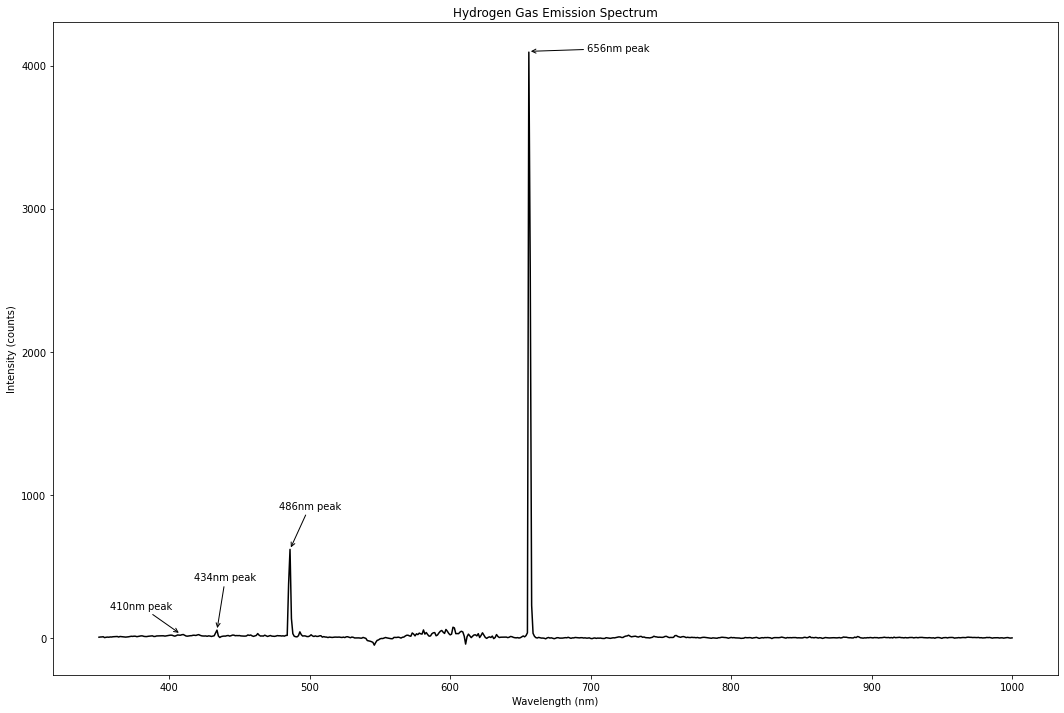

In [ ]:
#spectrum for H balmer series, raw data table has been excluded as it is ~2500 data entries
H_data=np.loadtxt('Hspectrum.txt')
H_spectrum=np.array(H_data)
plt.figure(figsize=(18,12))
plt.plot(H_spectrum[:,0],H_spectrum[:,4], color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.title('Hydrogen Gas Emission Spectrum')
plt.annotate('656nm peak', xy=(656,4100), xytext=(720, 4100),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('486nm peak', xy=(486,620), xytext=(500, 900),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('434nm peak', xy=(434,55), xytext=(440, 400),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('410nm peak', xy=(408,28), xytext=(380, 200),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.show()


The noticeable peaks at wavelengths 656nm and 486nm correspond to the respective $n_2$=3 and 4 to $n_1$=2 electron transitions respectively. There is a small peak at 434nm representing the $n_5$ to $n_2$ transition. There is a tiny hump visible at the expected 410nm peak. Looking at the data the intensity 10nm either side of 410nm varied between 12-19 counts, it peaked to 24 counts at 410nm. The peak was not easily visible due to the magnitude of the other peaks. However, even taking this into account, the same could be said for a multitude of other peaks of the same size which are not expected. These unwanted peaks can be attributed to the background intensities as detailed in the next cell. Even though a background count was taken immediately after recording the set of data from the hydrogen lamp, the background count's values fluctuate too much, hence with the equipment at hand cannot fully be taken away. In relation to the peak at 410nm, the peak was smaller in magnitude due to the smaller probability of electrons undergoing that specific transition. 
  
Abnormal looking intensities in the range of 550 - 640 nm, this could be attributed to the phosphorescence of white light 

In [ ]:
#calculating mean Rydberg constant value to compare to literary value
RH=np.array([1.097561*10**7,1.097394*10**7,1.097213*10**7,1.097561*10**7])
mean=np.mean(RH)
print(mean)


10974322.5


The expected value for RH was $10.9737 × 10^6 m^{−1}$ (https://physics.nist.gov/cgi-bin/cuu/Value?ryd), our calculated mean value was $10.9743 × 10^6 m^{−1}$. Using our experimental value we could predict a wavelength for the $n_2=7$ --> $n_1=2$ transition.
$\lambda=\frac{1}{R_H(\frac{1}{n_1^2}-\frac{1}{n_2^2})}$

In [ ]:
#theoretical n7 transition wavelength
n7_𝜆=1/(mean*((1/4)-(1/49)))
print(n7_𝜆)


3.9688605429224043e-07


The expected wavelength for the $n_7$ to $n_2$ transition was $397 nm$ +/- 0.19%, this didn't appear as a peak on our Balmer series spectrum due to the wavelength being out with the visible spectrum. The lamp may have emitted UV light, causing the transition to occur however it may not have been picked up by the sensor if it was out with the visible spectrum. The peak may not have appeared on our spectrum due to its low probability of the transition's occurrence. 
The first ionisation energy is the energy required to move an electron from a distance of infinity to the innermost shell ($n_1=1$, $n_2=∞$). when $n_2 = ∞$, $\frac{1}{n_2}$ tends to zero. 

$\lambda=\frac{1}{R_H(\frac{1}{n_1^2}-\frac{1}{n_2^2})}=\frac{1}{R_H(\frac{1}{1^2}-\frac{1}{∞^2})}=\frac{1}{R_H(1-0)}=\frac{1}{R_H}=\frac{1}{10.9743× 10^{6}}=9.1122 × 10^{-8}$ +\- 0.73% m

This wavelength of 91nm is then inserted into the formula $E=\frac{hc}{\lambda}$ to calculate the first ionisation energy,


In [ ]:
#first ionisation energy H
h=6.626*10**-34
c=2.998*10**8
𝜆_i=1/(mean)
E_i=(h*c)/𝜆_i
print(E_i)


2.1800215093323e-18


Expected value for the ionisation energy of Hydrogen was $2.18×10^{-18} J$ (https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Ionization_Energy/Ionization_Energies#:~:text=Lithium's%20first%20ionization%20energy%20drops,is%201310%20kJ%20mol%2D1.) when compared to our value obtained through calculation using our experimental Rydberg constant value $2.18×10^{-18} J$ +\-0.73% .It can be seen that they are the same when considering the amount of sig figs which were given to us. 
  
Now, ionisation energy in $kJmol^{-1}$ by dividing our value by 1000 and multiplying by Avogadro's number $(6.02214076×10^{23})$, which converted our first ionisation energy of Hydrogen to $1312.84\ kJmol^{-1}$ +- 0.73% , value of +\- 9.58  $kJmol^{-1}$ . The expected value from the same literary source was $1310\ kJmol^{-1}$, which fits within our uncertainty.

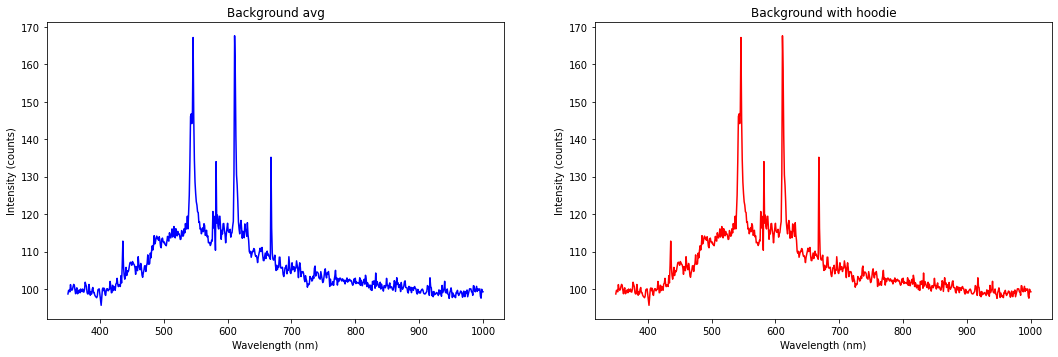

The average standard deviation of the Background data set is 8.91141501942921


In [ ]:
#Same as before but now with hoodie
plt.figure(figsize=(18,12))
Back=np.loadtxt('Backgrounds.txt')
plt.subplot(2,2,1)
plt.plot(Back[:,0],Back[:,2], color='b')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.title('Background avg')
plt.subplot(2,2,2)
plt.plot(Back[:,0],Back[:,2], color='r')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.title('Background with hoodie')
plt.show()
BackA=np.loadtxt('BackgroundRuns1-3.txt')
std=np.std(BackA)
print('The average standard deviation of the Background data set is',std)


This showed us the rough magnitude of how much we can expect our spectra intensities to vary by.

In addition covering the apperatus with a hoodie has no notacible differnece when comapred to uncovered, hence after this we did not use the hoodie

### Errors and Uncertainties

The systematic uncertainty in the wavelength measurments taken from the spectra is ± 0.5nm, in addition to the +/- 0.18%.
For case of wavelenght, +/- 0.5nm corelates to a percentage uncertainty of 0.55% for 91nm, hence total+\- 0.73%, this carries foward for the final ionisation energy


### Conclusions

A hydrogen emission spectrum was graphed by use of the spectrometer and hydrogen discharge tube. The peaks on this graph were successfully identified to represent the Balmer series. This data was an analysed to determine the Rydberg constant of $2.18×10^{-18} J$ +\-0.73% and the first ionisation energy of hydrogen found to be $1312.84\ kJmol^{-1}$ +- 9.58. Both values when compared to literacy values are within our uncertainties. 
  
Even though our effort of reducing background light, we believe that conducting this experiment in a completely dark room will result in clearer spectra, hence less human error in extracting data. This can be said about all following experiments. 
  
A use how data like this would be how spectrometry is used to determine the elemental spectra of stars, by comparing the absorption spectra obtained by said star to a library of spectra of different elements, as detailed earlier. 

# Part II:  Spectra of Light-Emitting Diodes

### Underlying

Light-emitting diodes (LEDs) are efficient light sources which emit light over a narrow spectrum corresponding to the band gap of the semiconductor material that is used in the active component

Plancks law was used in this section:
<div align="center">$E=\frac{hc}{\lambda}$</div><div align="right">[3]</div>
Equation [4] was used to determined the desired drive voltage $V_f$: 
<div align="center">$V_f=\frac{h\nu}{e}≈\frac{E_g}{e}{e}$</div><div align="right">[4]</div>
A maxwell Boltzmann distribution was later fitted to the data we aquired and was of the form:
<div align="center">$I=Ae^{\frac{-\epsilon}{kT}}$</div><div align="right">[5]</div>

### Method

![](LED.JPG)<div align="right">Figure.4</div>
Method was carried out as outlined in the lab script and apparatus was set up as shown in Figure.5. A diagram of the LED apparatus is shown in Figure.4. 
  
The tip of the fibre optic cable was positioned such that each colours spectra was of the largest possible intensity, intensity of the respective LED with then varied such that the whole peak was visible (Values of intensity over ~ 4100 cut off so our peaks lay just below this boundary) 
  
Red, Yellow, Green, Blue and White LED spectra were recorded to determine their respective peak wavelength absorbances. 
  
Halfwidth was calculated by dividing the maximum intensity by 2 and scouring spectra suite to find this intensity at either side of the graph, zooming in as far as possible (after a certain point the line is no longer displayed) and recording the wavelength at the respective intensity. 
  
* All halfwidth values are taken from a paused spectra suite graph due to the intensities of the LED fluctuating. This is due  to the fluctuation of the background as detailed prior. 
  
*  This was done to keep the halfwidth constant 




<img src="lab2_C.JPG" alt="lab2_C" width="400"/><div align="right">Figure.5</div>

### Data
|LED Colour|Peak Wavelength(s) (nm)|Halfwidth $\Delta\lambda$ (nm)|
|---|---|---|
|Red|637|14.87|
|Yellow|594|12.53|
|Green|525|34.65|
|Blue|475|25.08|
|White|449, 562|17.99, 114.33|



*Note that the two halfwidths for white are due to the two peaks seen.


### Analysis
The photon energy could be calculated for the respective LED's using the measured peak wavelengths and the equation $E=\frac{hc}{\lambda}$

In [ ]:
#photon energies being calculated from Planck's equation
LEDs=['red','yellow','green','blue']
peak_𝜆s=[637,594,525,475]
photon_Es=[]
n = np.arange(0,4,1)
for i in n:
    E=((h*c)/(peak_𝜆s[i]*10**-9))
    photon_Es.append(E)
print(photon_Es)


[3.1184847723704867e-19, 3.3442336700336696e-19, 3.7837615238095233e-19, 4.1820522105263156e-19]


The approximate drive voltage ($V_f$) of LED's is calculated from the photon energy divided by the elemental charge.

In [ ]:
e=1.6*10**-19
Vs=[]
n = np.arange(0,4,1)
for i in n:
    V=(photon_Es[i]/e)
    Vs.append(V)
print(Vs)


[1.949052982731554, 2.0901460437710435, 2.364850952380952, 2.613782631578947]


|LED Colour|Peak Wavelength (nm)|Photon Energy (J)|Bandgap Energy $E_g$ (eV)|Approximate Drive Voltage (V)|
|---|---|---|---|---|
|Red|637|3.118E-19|1.949|1.949|
|Yellow|594|3.344E-19|2.090|2.090|
|Green|525|3.784E-19|2.378|2.378|
|Blue|475|4.182E-19|2.614|2.614|

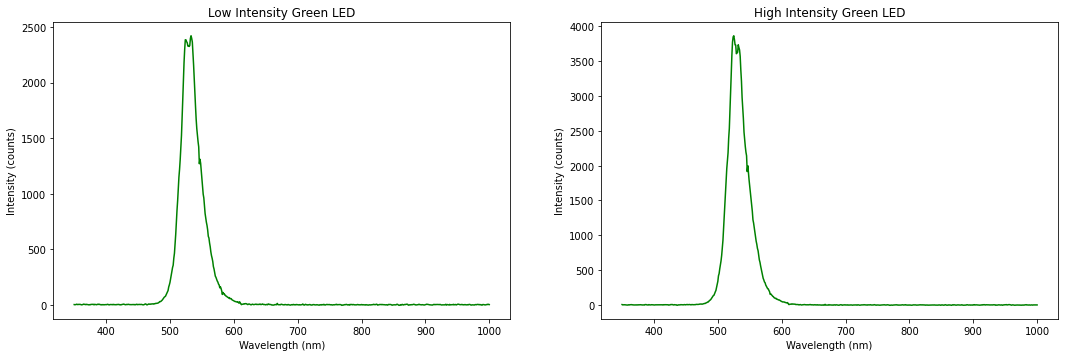

In [ ]:
#The peak wavelength for the green LED shifted depending on the intensity set on the LED apparatus
plt.figure(figsize=(18,12))
gl_data=np.loadtxt('gli.txt')
g_l_i=np.array(gl_data)
plt.subplot(2,2,1)
plt.plot(g_l_i[:,0],g_l_i[:,2], color='g')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.title('Low Intensity Green LED')
gh_data=np.loadtxt('ghi.txt')
g_h_i=np.array(gh_data)
plt.subplot(2,2,2)
plt.plot(g_h_i[:,0],g_h_i[:,2], color='g')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.title('High Intensity Green LED')
plt.show()


It was observed there were two peaks for the Green LED spectrum and that the intensity changed the peak wavelength. The high intensity data was used for the combined graph as all other coloured were recorded at high intensity due to opur method of obtaining the data for each LED.

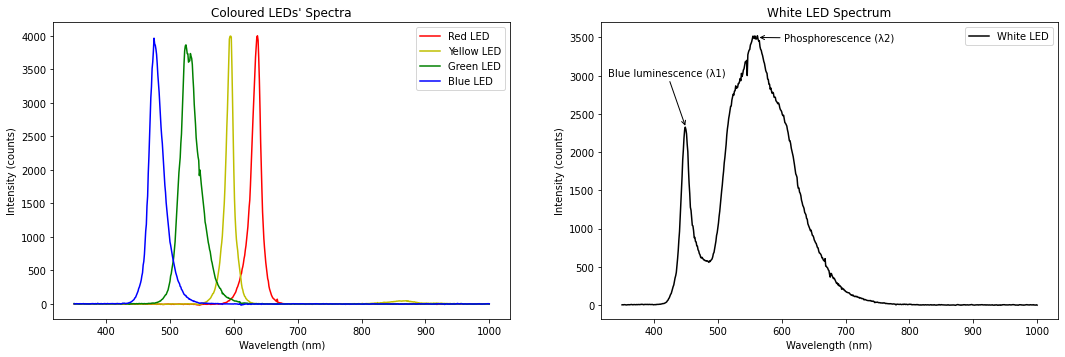

In [ ]:
#combined graph displaying the 4 coloured LEDs' peak wavelenghts as functions of intensity
red_data=np.loadtxt('RedLED.txt')
yellow_data=np.loadtxt('YellowLED.txt')
green_data=np.loadtxt('ghi.txt')
blue_data=np.loadtxt('bhi.txt')
red=np.array(red_data)
yellow=np.array(yellow_data)
green=np.array(green_data)
blue=np.array(blue_data)
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.plot(red[:,0],red[:,1], label='Red LED', color='r')
plt.plot(yellow[:,0],yellow[:,1], label='Yellow LED', color='y')
plt.plot(green[:,0],green[:,2], label='Green LED', color='g')
plt.plot(blue[:,0],blue[:,2], label='Blue LED', color='b')
plt.title("Coloured LEDs' Spectra")
plt.legend()
#here we aregraphing the white light LED's wavelength as a fucntion of intensity to determine phosphorescence and luminesence peaks
white_data=np.loadtxt('WhiteLED.txt')
white=np.array(white_data)
plt.subplot(2,2,2)
plt.plot(white[:,0],white[:,1], label='White LED', color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.annotate('Blue luminescence (λ1)', xy=(450,2320), xytext=(420, 3000),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('Phosphorescence (λ2)', xy=(562,3500), xytext=(690, 3450),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.title("White LED Spectrum")
plt.legend()
plt.show()


The spectral colour region of the phosphorescence can be seen to be 486-778 nm

The labscripts now details that we plot for photon energy as a function of light intensity, fit high energy region of each colour to a MB distribution

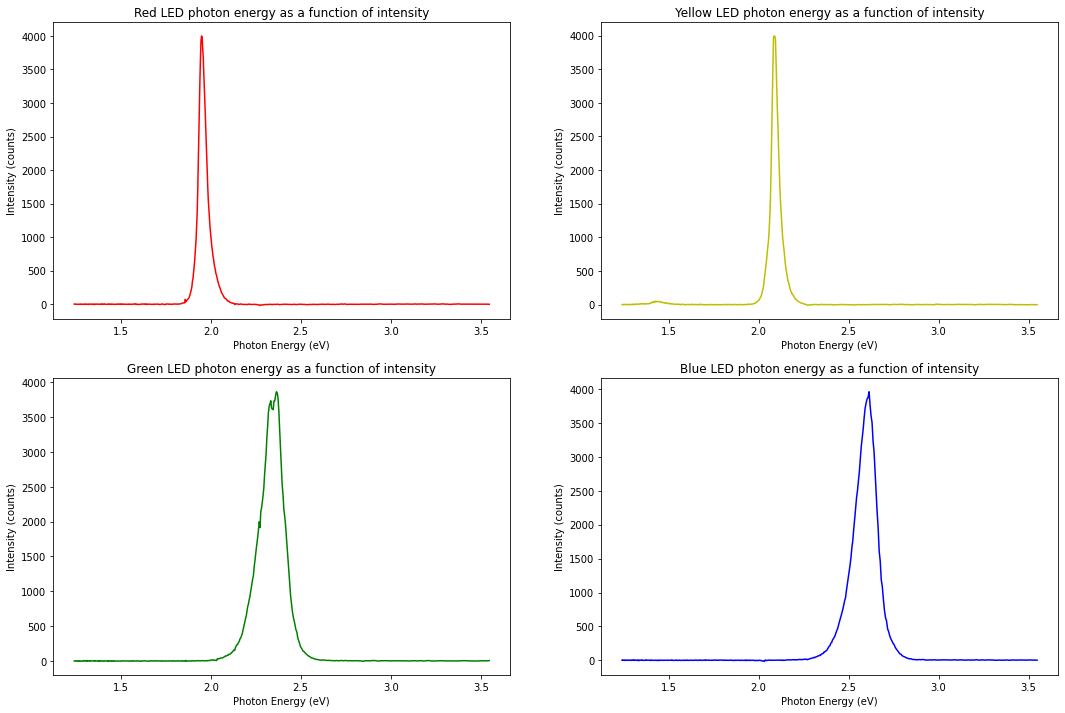

In [ ]:
#photon energy as a function of intensity graph (MB distribution)
#photon energies had to be multiplied by 1e9 since we forgot to convert nm to m for the calculation in excel
k=8.6173*10**(-5)#eVK^-1
photon_energies_data=np.loadtxt('PhotonEnergies.txt')
Photon_Energies=np.array(photon_energies_data)
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,1], label='', color='r')
plt.title("Red LED photon energy as a function of intensity")
plt.subplot(2,2,2)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,2], label='', color='y')
plt.title("Yellow LED photon energy as a function of intensity")
plt.subplot(2,2,3)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,3], label='', color='g')
plt.title("Green LED photon energy as a function of intensity")
plt.subplot(2,2,4)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,4], label='', color='b')
plt.title("Blue LED photon energy as a function of intensity")
plt.show()


In [ ]:
#graphs showing the top 70% of each peak wavelength
#this is wrong it wants baseline to 70 not pesk to 30
#red_x=np.array(Photon_Energies[273:-353])
#yellow_x=np.array(Photon_Energies[234:-397])
#green_x=np.array(Photon_Energies[160:-443])
#blue_x=np.array(Photon_Energies[114:-502])
#plt.figure(figsize=(18,12))
#plt.subplot(2,2,1)
#plt.ylabel('Intensity (counts)')
#plt.xlabel('Photon Energy (eV)')
#plt.plot(red_x[:,0]*1e9,red_x[:,1], label='', color='r')
#plt.title("Red LED photon energy as a function of intensity")
#plt.subplot(2,2,2)
#plt.ylabel('Intensity (counts)')
#plt.xlabel('Photon Energy (eV)')
#plt.plot(yellow_x[:,0]*1e9,yellow_x[:,2], label='', color='y')
#plt.title("Yellow LED photon energy as a function of intensity")
#plt.subplot(2,2,3)
#plt.ylabel('Intensity (counts)')
#plt.xlabel('Photon Energy (eV)')
#plt.plot(green_x[:,0]*1e9,green_x[:,3], label='', color='g')
#plt.title("Green LED photon energy as a function of intensity")
#plt.subplot(2,2,4)
#plt.ylabel('Intensity (counts)')
#plt.xlabel('Photon Energy (eV)')
#plt.plot(blue_x[:,0]*1e9,blue_x[:,4], label='', color='b')
#plt.title("Blue LED photon energy as a function of intensity")
#plt.show()


In [ ]:
photon_energies_data=np.loadtxt('PhotonEnergies.txt')
Photon_Energies=np.array(photon_energies_data)
XPhoton_Energies=Photon_Energies[:,0]
Red_Photon_Energies=Photon_Energies[:,1]
Yellow_Photon_Energies=Photon_Energies[:,2]
Green_Photon_Energies=Photon_Energies[:,3]
Blue_Photon_Energies=Photon_Energies[:,4]
red_range=XPhoton_Energies[229:-369]
yellow_range=XPhoton_Energies[199:-410]
green_range=XPhoton_Energies[92:-481]
blue_range=XPhoton_Energies[74:-531]
red_E=np.array(Red_Photon_Energies[229:-369])#column1
yellow_E=np.array(Yellow_Photon_Energies[199:-410])#2
green_E=np.array(Green_Photon_Energies[92:-481])#3
blue_E=np.array(Blue_Photon_Energies[74:-531])#4



The fitting parameter equalled 4.289e+30 and the red LED had a p-n junction temperature of 365.2 K
The fitting parameter equalled 1.116e+36 and the yellow LED had a p-n junction temperature of 325.5 K
The fitting parameter equalled 1.601e+26 and the green LED had a p-n junction temperature of 530.3 K
The fitting parameter equalled 9.438e+31 and the blue LED had a p-n junction temperature of 467.8 K


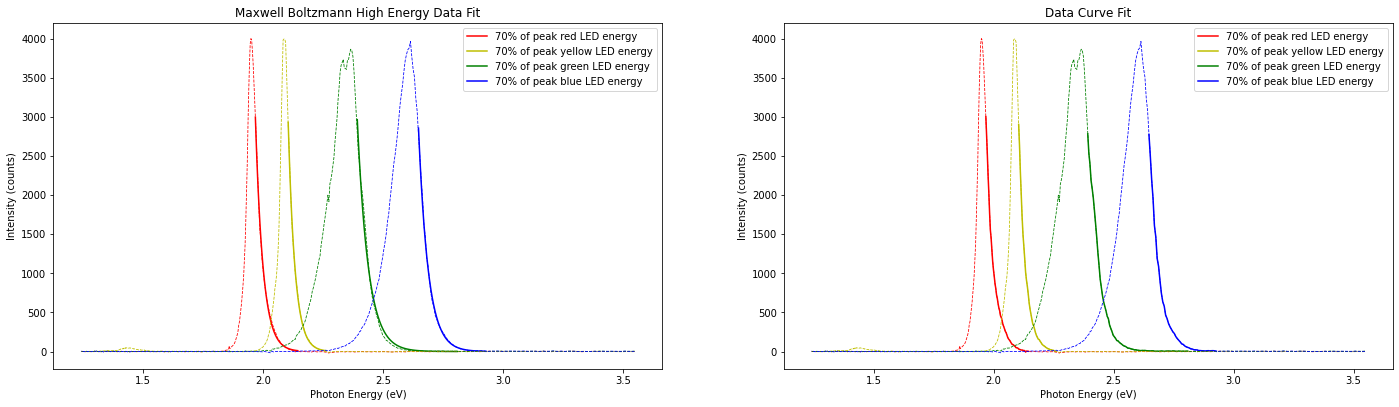

In [ ]:
#MB distribution
k=8.6173*10**(-5)
εr=red_range*10**9
εy=yellow_range*10**9
εg=green_range*10**9
εb=blue_range*10**9



plt.figure(figsize=(24,14))
plt.subplot(2,2,1)



#fitting distribution to red LED photon energy data
def MB(εr,A,Tr):
    return A*np.exp(-εr/(k*Tr))
params,params_covariance=optimize.curve_fit(MB,εr,red_E,p0=[1.9*10**30,390])



plt.plot(εr,MB(εr,params[0],params[1]),color='r',label='70% of peak red LED energy')
print('The fitting parameter equalled {0:1.4g}'.format(params[0]),'and the red LED had a p-n junction temperature of {0:1.4g}'.format(params[1]),'K')
#fitting distribution to yellow LED photon energy data



def MB(εy,A,Ty):
    return A*np.exp(-εy/(k*Ty))
params,params_covariance=optimize.curve_fit(MB,εy,yellow_E,p0=[1.9*10**30,350])



plt.plot(εy,MB(εy,params[0],params[1]),color='y',label='70% of peak yellow LED energy')
print('The fitting parameter equalled {0:1.4g}'.format(params[0]),'and the yellow LED had a p-n junction temperature of {0:1.4g}'.format(params[1]),'K')
#fitting distribution to green LED photon energy data



def MB(εg,A,Tg):
    return A*np.exp(-εg/(k*Tg))
params,params_covariance=optimize.curve_fit(MB,εg,green_E,p0=[1.9*10**30,350])


plt.plot(εg,MB(εg,params[0],params[1]),color='g',label='70% of peak green LED energy')
print('The fitting parameter equalled {0:1.4g}'.format(params[0]),'and the green LED had a p-n junction temperature of {0:1.4g}'.format(params[1]),'K')
#fitting distribution to blue LED photon energy data


def MB(εb,A,Tb):
    return A*np.exp(-εb/(k*Tb))
params,params_covariance=optimize.curve_fit(MB,εb,blue_E,p0=[1.9*10**30,450])



plt.plot(εb,MB(εb,params[0],params[1]),color='b',label='70% of peak blue LED energy')
print('The fitting parameter equalled {0:1.4g}'.format(params[0]),'and the blue LED had a p-n junction temperature of {0:1.4g}'.format(params[1]),'K')
#
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,1], color='r',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,2], color='y',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,3], color='g',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,4], color='b',linestyle='dashed',linewidth=0.8)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.title('Maxwell Boltzmann High Energy Data Fit')
plt.legend()
#maxwell boltzmann distribution for  LED
plt.subplot(2,2,2)
plt.plot(red_range*1e9,red_E, label='70% of peak red LED energy', color='r')
plt.plot(yellow_range*1e9,yellow_E, label='70% of peak yellow LED energy', color='y')
plt.plot(green_range*1e9,green_E, label='70% of peak green LED energy', color='g')
plt.plot(blue_range*1e9,blue_E, label='70% of peak blue LED energy', color='b')
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,1], color='r',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,2], color='y',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,3], color='g',linestyle='dashed',linewidth=0.8)
plt.plot(Photon_Energies[:,0]*1e9,Photon_Energies[:,4], color='b',linestyle='dashed',linewidth=0.8)
plt.ylabel('Intensity (counts)')
plt.xlabel('Photon Energy (eV)')
plt.title('Data Curve Fit')
plt.legend()
plt.show()


|LED Colour|p-n Junction Temperature (K)|
|-|-|
|Red|365.2|
|Yellow|325.5|
|Green|530.3|
|Blue|467.8|

### Errors & Uncertainties

A chi squared and reduced chi suared value for the goodnes of fit of the boltzman distribution will now be calculated. In addition, as seen prior in callibration the systematic uncertainty in the wavelength and half width measurments taken from the spectra is ± 0.5nm, in addition to the +/- 0.18%.

In [ ]:
# Define the Boltzmann distribution function
def MB(ε, A, T):
    return A * np.exp(-ε / (k * T))

# Create an array to store the chi-squared values
chi_squared_values = []

# Loop through each LED color and fit the distribution
for color_range, color_E, color_name in zip([red_range, yellow_range, green_range, blue_range],
                                            [red_E, yellow_E, green_E, blue_E],
                                            ['red', 'yellow', 'green', 'blue']):
    params, params_covariance = optimize.curve_fit(MB, color_range * 1e9, color_E, p0=[1.9e30, 390])  # You may adjust the initial guess as needed

    # Calculate the expected values using the fitted parameters
    expected_values = MB(color_range * 1e9, params[0], params[1])

    # Calculate the residuals
    residuals = color_E - expected_values

    # Calculate the chi-squared value
    chi_squared = np.sum(residuals**2 / expected_values)

    print(f"For {color_name} LED:")
    print('The fitting parameter A equalled {0:1.4g}'.format(params[0]))
    print(f'Chi-squared value: {chi_squared}')
    print()

    chi_squared_values.append(chi_squared)

# Now, chi_squared_values contains the chi-squared values for each LED color fit


For red LED:
The fitting parameter A equalled 4.289e+30
Chi-squared value: 138.3683814956006

For yellow LED:
The fitting parameter A equalled 1.116e+36
Chi-squared value: 29.64888836988583

For green LED:
The fitting parameter A equalled 1.601e+26
Chi-squared value: 779.7555382412613

For blue LED:
The fitting parameter A equalled 9.438e+31
Chi-squared value: 69.38280446371252



### Conclusions


We set out to obtain visible light absorption spectra for the different coloured LEDs, so we could use the spectra to determine peak absorption wavelengths and other characteristics of the lights. The peak wavelengths for the different coloured LEDs were successfully measured as 637, 594, 525 and 475 nm for the red, yellow, green and blue LEDs, respectfully. The halfwidth of these wavelength peaks were also determined as 14.87, 12.53, 34.65 and 25.08 nm for the respective colours. This was used to calculate drive voltage. A Boltzmann distribution was fit to the high energy side of graph to determine p-n Junction temperature. Although we could not find anything on how p-n Junction temperature should vary given our LED's, the largest outlier is the green LED. It also has the worst chi squared value of 780, showing that our data is a less than satisfactory fit to our data for green. Although only stipulation we would expect a smaller value of temperature for the green LED. This can be attributed to the 'spit' peak discussed earlier, with the peak wavelength being highly dependent on intensity. Properties of White light was also discussed, and phosphorescence and blue luminescence were able to be distinguished and labelled in the spectrum. 

# Part III: Birefringent Interference Filters

### Underlying 

The term birefringence denotes a property a non-dispersive material/medium can exhibit in which it is observed to possess two different refractive indices, depending upon the spacial orientation of the incident (polarised) light with respect to the normal axis of the material. This means that a phase shift will occur between two waves of from a source that are oriented/polarised differently. An optical path difference is observed due to the speed of the wave through the medium varying dependent upon the refractive index. The two refractive indices of the birefringent material are described as ordinary and extraordinary which relate to the optical path lengths:
<div align="center">$\Delta l=l_e-l_o=(n_e-n_o)d=\Delta nd$</div>
Where $l_e$ and $l_o$ equal $n_od$ and $n_ed$ respectively.
From this seperation the phase shift can be determined:
<div align="center">$\Delta \phi=2\pi \frac{\Delta l}{\lambda}=\frac{2\pi}{\lambda} d\Delta n$</div>


$\Delta \phi_{calculated}=2arctan(\sqrt{{\frac{i_{crossed}}{i_{parallel}}}})$

### Method

![](Bi.JPG)<div align="right">Figure.4</div>
Method was carried out as outlined in the lab script and apparatus was set up as shown in Figure.6.


 A point of destructive interference was found by shining the tungsten lamp through the polariser and analyser then rotating it until no light was visible (crossed setup). The analyser was then rotated 90° to the right (parallel setup).
 
To be able to see if there was light visable we temproalily moved the optic cable so we could look down both the Analyser and polariser.

At this stage we turned the voltage on the plug supplying power to the lamp (previously powering the LEDs) from 3 to 12V. This made the light source able to be picked up by the optical cable.

### Data
|Analyser Setup|Analyser Angle (°)|Polariser Angle (°)|
|-|-|-|
|Crossed|34/43|0/9|
|Parallel|124/133|0/9|

### Analysis

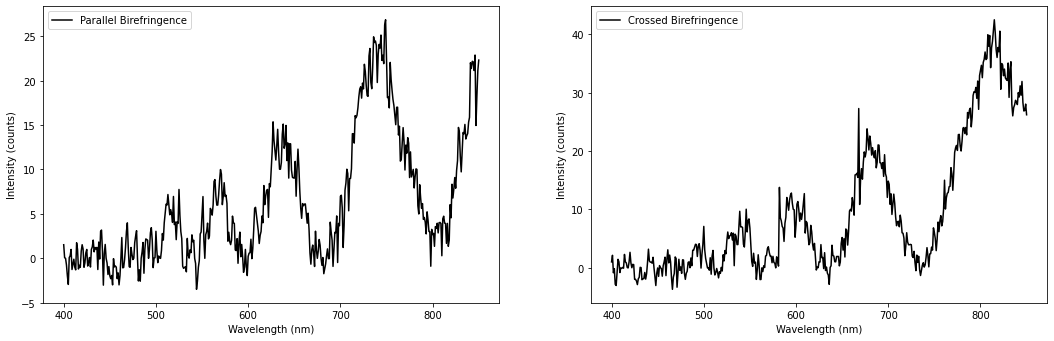

In [ ]:
#graphs of the different analyser positions
W=np.loadtxt('TungstenLamp.txt')
Tungsten=np.array(W)
wavelengths=Tungsten[:,0]
Parallel=Tungsten[:,2]
Crossed=Tungsten[:,3]
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.plot(wavelengths,Parallel, label='Parallel Birefringence', color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.subplot(2,2,2)
plt.plot(wavelengths,Crossed, label='Crossed Birefringence', color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.show()


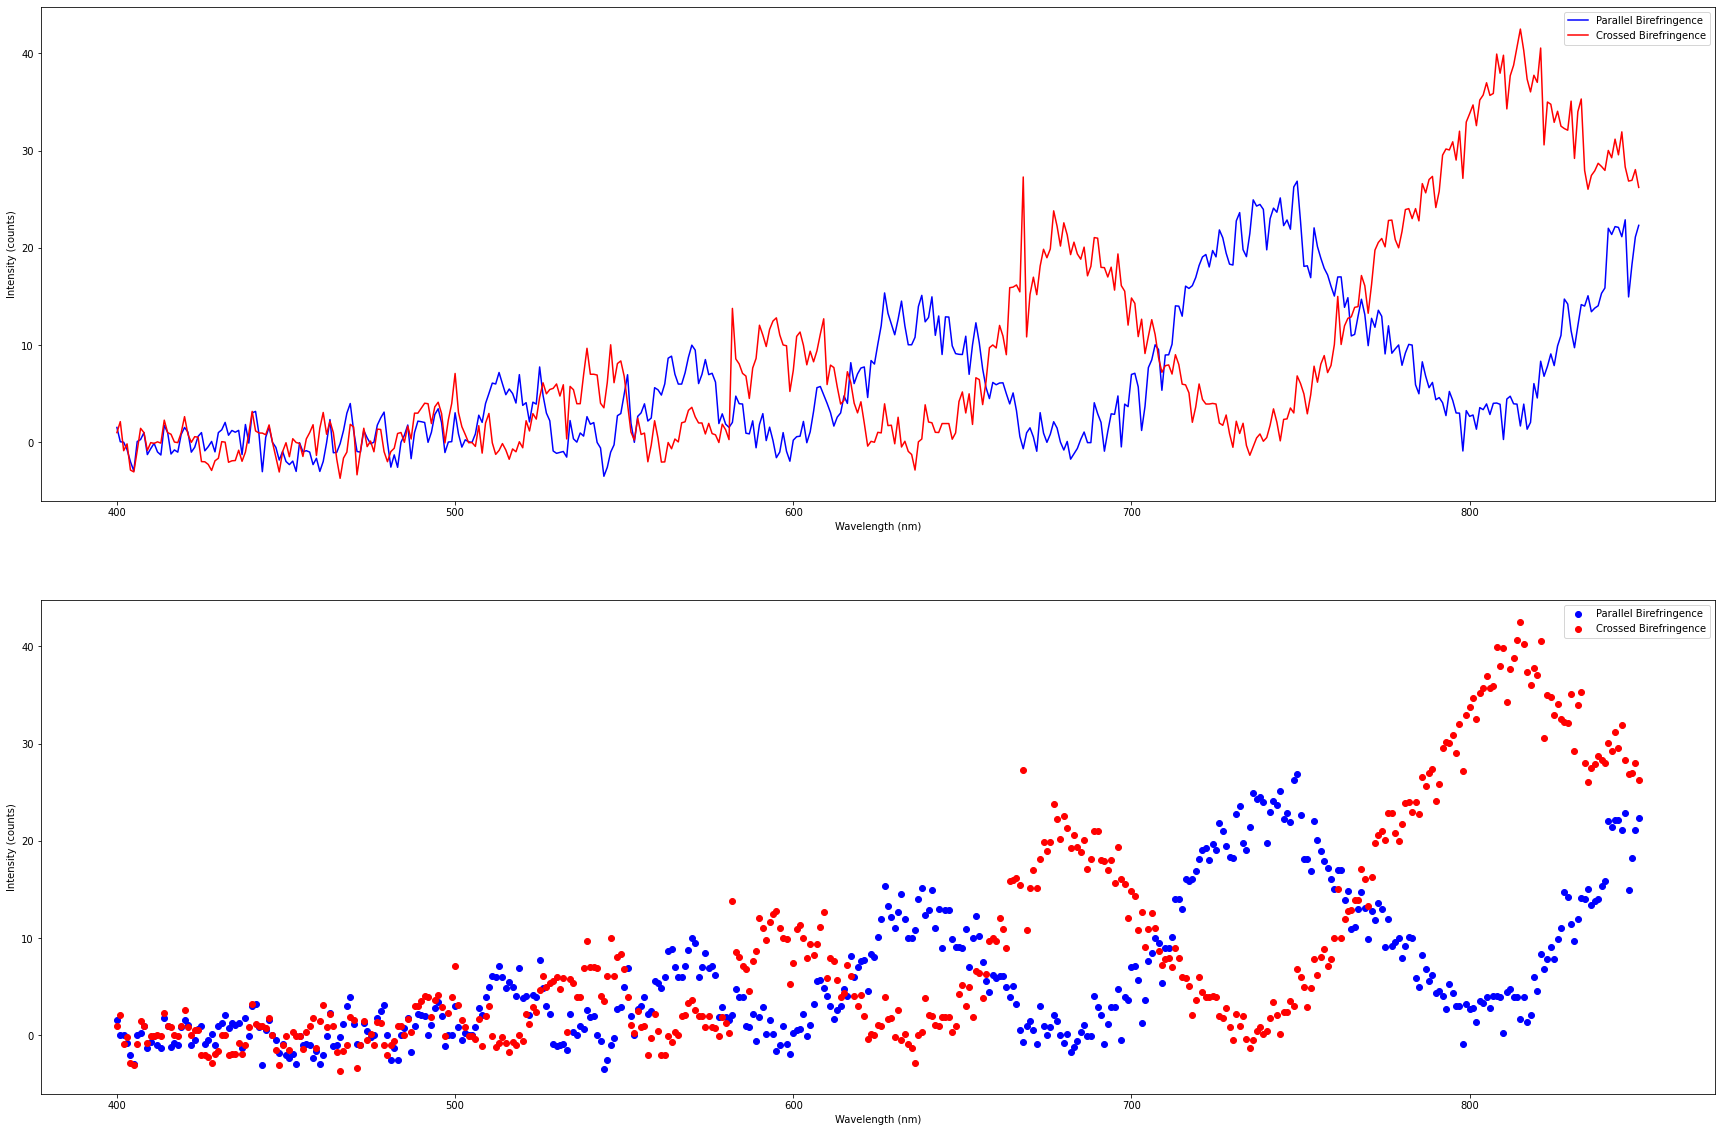

In [ ]:
#overlay of the two different analyser positions to show they are pi out of phase
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
plt.plot(wavelengths,Parallel, label='Parallel Birefringence', color='b')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.plot(wavelengths,Crossed, label='Crossed Birefringence', color='r')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.subplot(2,1,2)
plt.scatter(wavelengths,Parallel, label='Parallel Birefringence', color='b')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.scatter(wavelengths,Crossed, label='Crossed Birefringence', color='r')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.show()


It could be observed from the combination of the two graphs that the parallel and crossed filter positions were pi integers out of phase. Thus relation was expected as the labscript equations for $i_{parallel}$ and $i_{crossed}$ are cosine and sine functions, respcetfully.

The intensities of these graphs have the background light subtracted to focus on the LED spectra. Unfortunetly the background light intensity varied alot (std ~ 9 as before)meaning negative and zero values were recorded. These prohibited us from using this data for the phase shift calulations as it couldn't be normalised (due to the inability of dividing by the zero values or take the square root of the negative transmissions). Therefore it was repeated without subtracting the background light data, this allowed the phase shift to be calculated as the transmission could be normalised. 

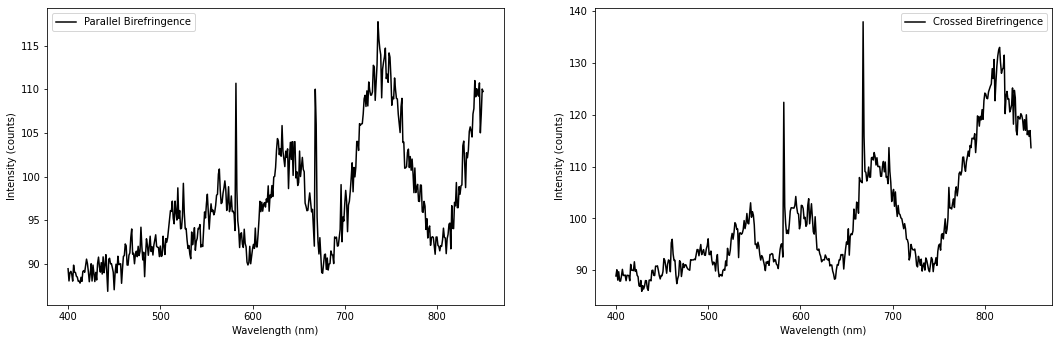

In [ ]:
#testing with background
W2=np.loadtxt('birefringence2.txt')
Tungsten2=np.array(W2)
wavelengths2=Tungsten2[:,0]
Parallel2=Tungsten2[:,1]
Crossed2=Tungsten2[:,3]
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.plot(wavelengths2,Parallel2, label='Parallel Birefringence', color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.subplot(2,2,2)
plt.plot(wavelengths2,Crossed2, label='Crossed Birefringence', color='k')
plt.ylabel('Intensity (counts)')
plt.xlabel('Wavelength (nm)')
plt.legend()
plt.show()


The $\Delta\phi_{actual}$ values could be calculated by rearranging equations (8) and (9) from the labscript,
<div align="middle">$\Delta\phi=2{cos}^{-1}(\sqrt{i_{parallel}})$</div> <div align="right">(8)</div>
<div align="middle">$\Delta\phi=2sin^{-1}(\sqrt{i_{crossed}})$</div><div align="right">(9)</div>
Where $i_{parallel}$ and $i_{crossed}$ can be found from our experimental measurements for intensity.
The experimental intensity values for the different analyser setups were normalised with the below equations:
<div align="middle">$i_{parallel}=\frac{I_{parallel}}{I_{crossed}+I_{parallel}}$</div><div align="right">(10)</div>
<div align="middle">$i_{crossed}=\frac{I_{crossed}}{I_{crossed}+I_{parallel}}$</div><div align="right">(11)</div>
Where $I_{crossed}$ and $I_{parallel}$ represent the recorded intensity values for the crossed and parallel setups, respectfully. From the normalised transitions we could obtain a calculated value for phase shift, $\Delta\phi_{calculated}$,
<div align="middle">$\Delta \phi_{calculated}=2arctan(\sqrt{{\frac{i_{crossed}}{i_{parallel}}}})$</div><div align="right">(12)</div>

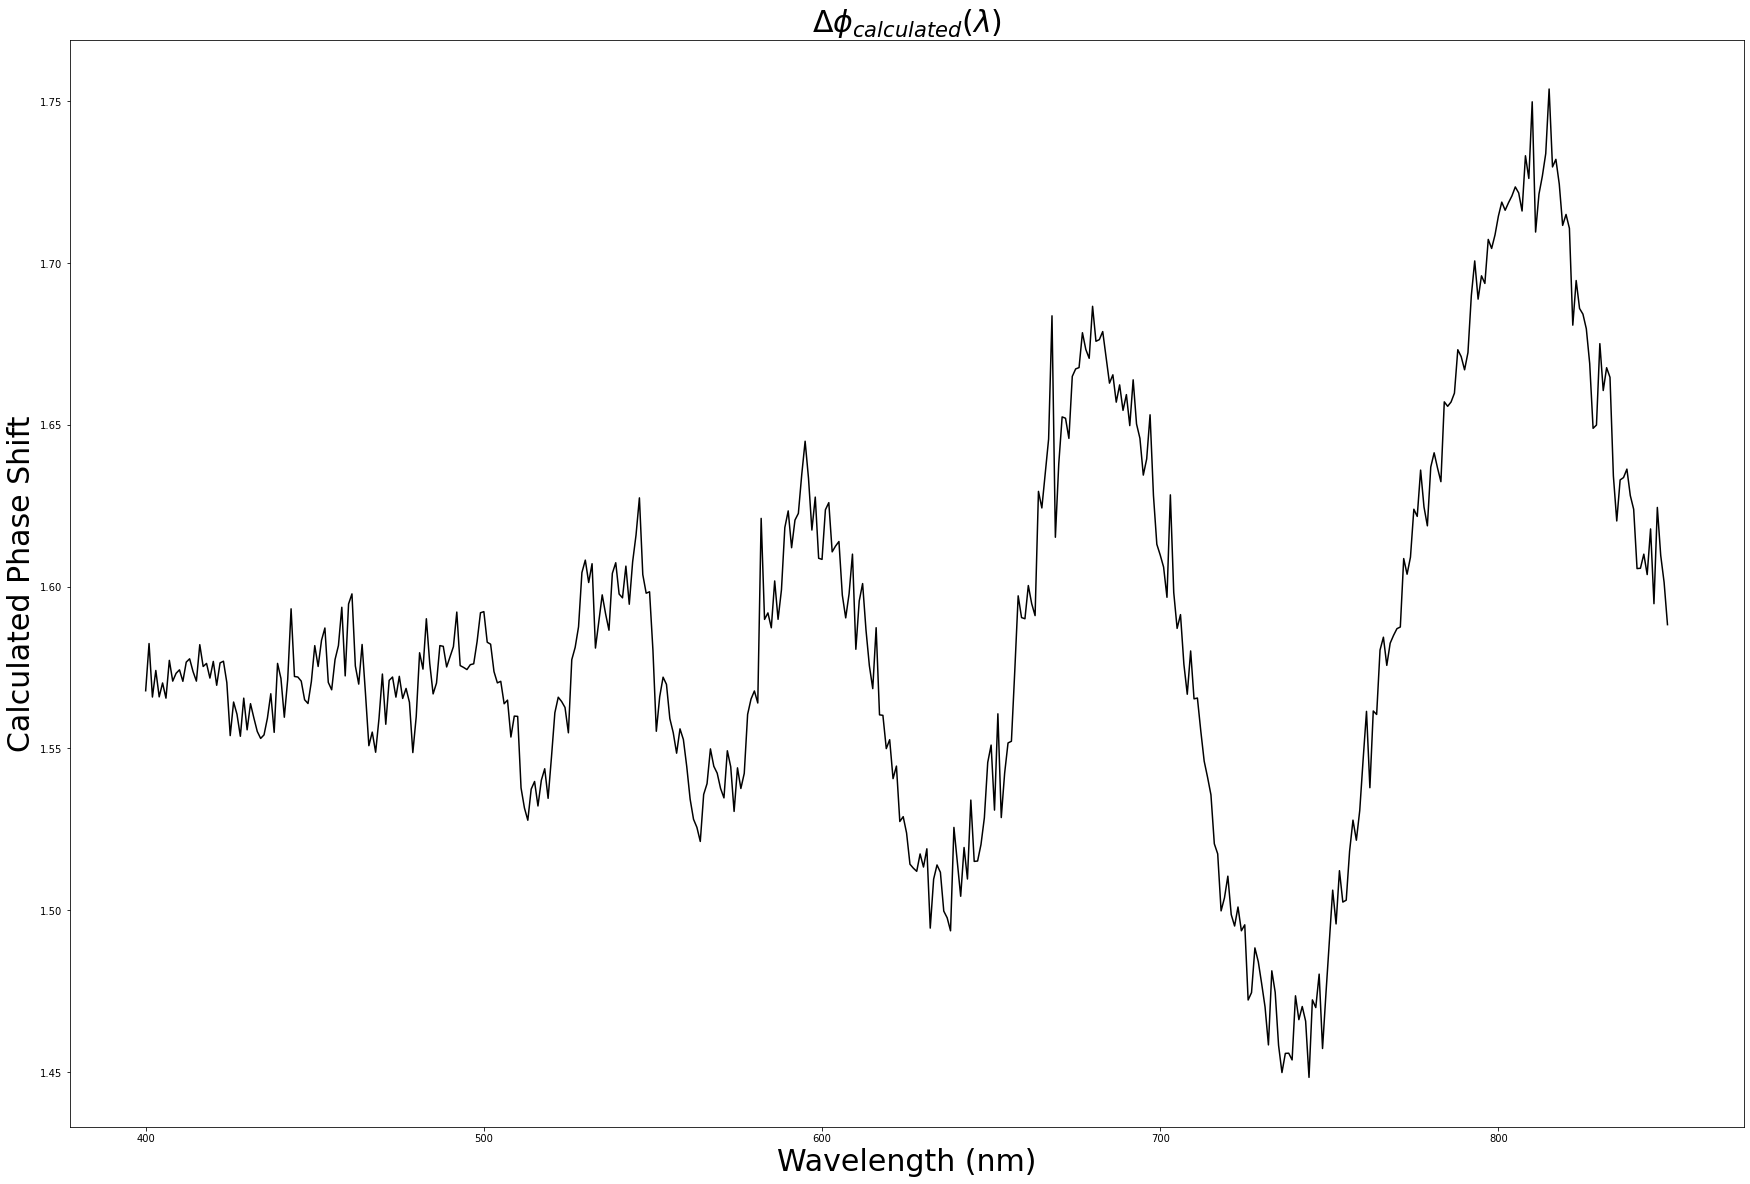

In [ ]:
#using equation (11) from labscript to normalise crossed intensities
i_c=[]
n = np.arange(0,451,1)
for i in n:
    YY=(Crossed2[i])/((Crossed2[i])+(Parallel2[i]))
    i_c.append(YY)
#normalising tranmission
#using equation (10) from labscript to normalise parallel intensities
i_p=[]
n = np.arange(0,451,1)
for i in n:
    XX=(Parallel2[i])/((Crossed2[i])+(Parallel2[i]))
    i_p.append(XX)
#using equation (8) from labscript for phase shift (rearranged)
parallel_phase_shift=[]
n = np.arange(0,451,1)
for i in n:
    phi=2*np.arccos(np.sqrt(i_p[i]))
    parallel_phase_shift.append(phi)
#using equation (9) from labscript for phase shift (rearranged)
crossed_phase_shift=[]
n = np.arange(0,451,1)
for i in n:
    phi=2*np.arcsin(np.sqrt(i_c[i]))
    crossed_phase_shift.append(phi)
#using equation (12) from labscript for phase shift
phase_shifts_calculated=[]
n = np.arange(0,451,1)
for i in n:
    phi3=2*np.arctan((np.sqrt(i_c[i]/i_p[i])))
    phase_shifts_calculated.append(phi3)
#graph to show wavelength is inversely proportional to phase shift
plt.figure(figsize=(30,20))
Δ𝜙_calculated=phase_shifts_calculated
𝜆=wavelengths2
plt.plot(𝜆,phase_shifts_calculated,  color='k')
plt.ylabel('Calculated Phase Shift',fontsize='30')
plt.xlabel('Wavelength (nm)',fontsize='30')
plt.title('$\Delta\phi_{calculated}(\lambda)$',fontsize='30')
plt.show()


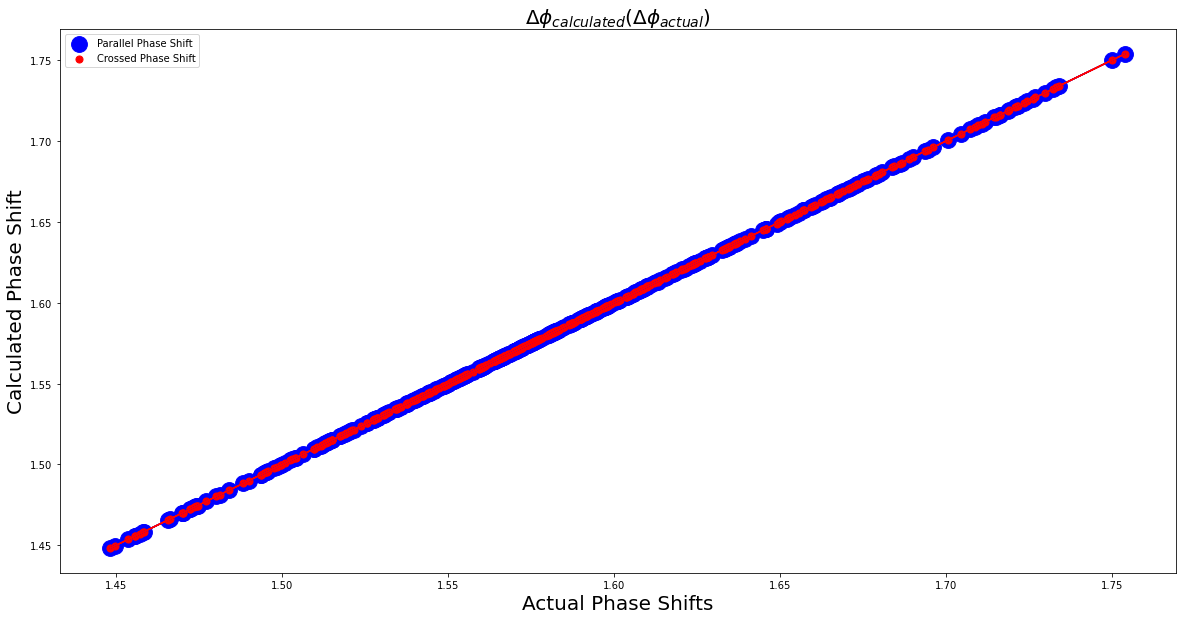

In [ ]:
#graph of calculated against actual phase shift(s)
calculated_phase_shift=phase_shifts_calculated
plt.figure(figsize=(20,10))
plt.title('$\Delta\phi_{calculated}(\Delta\phi_{actual})$',fontsize='20')
plt.scatter(parallel_phase_shift,calculated_phase_shift, label='Parallel Phase Shift',s=250, color='b')
plt.scatter(crossed_phase_shift,calculated_phase_shift, label='Crossed Phase Shift',s=50, color='r')
plt.plot(parallel_phase_shift,calculated_phase_shift, color='b')
plt.plot(crossed_phase_shift,calculated_phase_shift, color='r')
plt.xlabel('Actual Phase Shifts',fontsize='20')
plt.ylabel('Calculated Phase Shift',fontsize='20')
plt.legend()
plt.show()
#one data set's markers were made larger so it was visible that both had the same values


The gradient of the line is 1, this is because the actual and calculated values are the same, they are derived by combining equations of the same variables. It was stated in the labscript that equation (12) was derived from equations (8) and (9). Since we were substituting the same values in then we saw the same data and ultimately a straght line of gradient 1.

### Errors & Uncertainties

As before systematic uncertainty in the wavelength measurments taken from the spectra is ± 0.5nm, in addition to the +/- 0.18%.

### Conclusions

$\Delta\phi_{calculated}(\lambda)$ Graph did not take the form we expected, we expected a straight line showing inverse proportionality between wavelength and phase shift. Looking at the paper Interference birefringent filters fabricated with low cost commercial polymers, Velasquez et al, 2004. They use a polymer filter to produce a spectrum that is like that shown in the graph discussed. The more layers of a monomer filter they opverlapped, the more periods of same relation to ours appeared. It can be deduced that our filter had roughly 7 layers of monomer filter.


Initially we subtracted the background light data so our produced spectrum soley represented the Tungsten lamp's photon data. However as previously discussed this didn't allow for the required analysis to be conducted so the spectra had to be rerecorded. It would be recommended that upon reciprocation of this experiment one would record the spectra data 3-5 times then average the intensities to minimise any significant effects caused by brackground light fluctuations.

Even though our effort of reducing background light, we believe that conducting this experiemnt in a completeky dark room will result in clearer spectra, hence less human error in extracting data.

An overall conclusion can be drawn that theb specrometry apperatus is a very easy tool to obtain accurate specra very quickly. We belive that conducting this experiment without Ocean Red Tide USB650 spectrometer would result in a whole host of human errors and unquantifiable uncertanties.

A quality of life change vthat could be mande would be a stiifer arm for the optic cable to be held by as ours had a tendancy to swivel and would only 'stick' at a very small part of its rotating axis.